### 1. Xử lý dữ liệu vào và in một vài ảnh

In [1]:
import os
import numpy as np
# set names to the paths because they're too long
data_path = 'C:\\Users\\lan\\Desktop\\Machine Learning Project\\data'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [2]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
        
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [3]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


In [4]:
# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)

# These methods are from Vi du 1
def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

<Figure size 432x288 with 0 Axes>

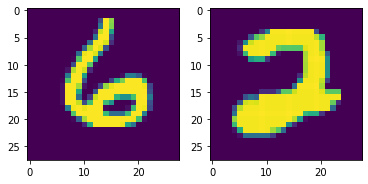

In [5]:
import random
import matplotlib.pyplot as plt

index = random.randint(0, 1000)

train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)

# use the created array to output your multiple images. In this case I havestacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.savefig('./results/test.png', bbox_inches='tight', dpi = 300)
plt.show()

### 2. Rút gọn chiều và hiển thị phân lớp trực quan 2D & 3D

#### a. Hiển thị 3D

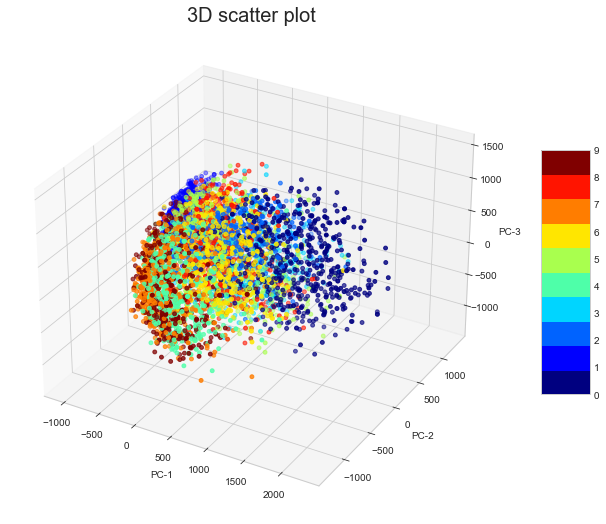

In [6]:
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

pca = PCA(n_components=3) #100-dimensional PCA
transformed = pca.fit_transform(train_images)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

c_map = plt.cm.get_cmap('jet', 10)
sctt = ax.scatter3D(transformed[:, 0], transformed[:, 1], transformed[:, 2], s = 15, cmap = c_map , c = train_labels)
ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.title("3D scatter plot", fontsize = 20)
plt.savefig('./results/3D_scatter_plot.png', bbox_inches='tight', dpi = 300)
plt.show()

#### b. Hiển thị 2D

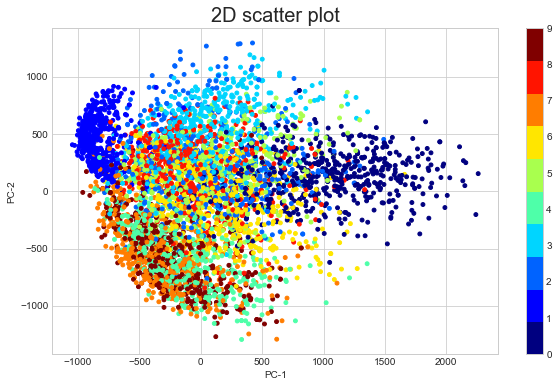

In [7]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(transformed[:, 0], transformed[:, 1], s = 15, cmap = c_map , c = train_labels)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.title("2D scatter plot", fontsize = 20)
plt.savefig('./results/2D_scatter_plot.png', bbox_inches='tight', dpi = 300)
plt.show()

### 2. Giảm chiều PCA

In [8]:
images = np.concatenate((train_images, test_images), axis = 0)
print(images.shape)

from sklearn.decomposition import PCA

pca = PCA(n_components=100) #100-dimensional PCA
converted_data = pca.fit_transform(images)

U = pca.components_.T
print(U.shape)

(15000, 784)
(784, 100)


In [9]:
print(converted_data.shape)
train_data = converted_data[:5000]
test_data = converted_data[5000:]
print(train_data.shape)
print(test_data.shape)

(15000, 100)
(5000, 100)
(10000, 100)


In [10]:
X_train = np.array(train_data).T
Y_train = convert_labels(train_labels, 10)
print(X_train.shape, Y_train.shape)

X_test = np.array(test_data).T
Y_test = convert_labels(test_labels, 10)
print(X_test.shape, Y_test.shape)

(100, 5000) (10, 5000)
(100, 10000) (10, 10000)


### 3. Xây dựng mô hình ANN

In [11]:
#definition of ReLU, or you can use maximum directly
def ReLU(V):
    return np.maximum(V, 0)

In [12]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

In [13]:
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [14]:
def ANN_3layer_SolveMNIST(X_train, Y_train, theta, max_count):
    X, Y = X_train, Y_train
    d, N = X_train.shape
    C = Y_train.shape[0]
    d1, d2 = 70, C
    # make random data
    W1 = 0.01*np.random.randn(d, d1)
    b1 = np.zeros((d1, 1))
    W2 = 0.01*np.random.randn(d1, d2)
    b2 = np.zeros((d2, 1))

    for i in range(max_count + 1):
        ## Feedforward
        Z1 = np.dot(W1.T, X) + b1
        A1 = ReLU(Z1)
        Z2 = np.dot(W2.T, A1) + b2
        Yhat = softmax(Z2)

        # print loss after each 1000 iterations
        if i % 10 == 0:
            loss = cost(Y, Yhat)
            print("iter %d, loss: %f" %(i, loss))

        # backpropagation
        E2 = (Yhat - Y )/N
        dW2 = np.dot(A1, E2.T)
        db2 = np.sum(E2, axis = 1, keepdims = True)
        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0 # gradient of ReLU
        dW1 = np.dot(X, E1.T)
        db1 = np.sum(E1, axis = 1, keepdims = True)

        # Gradient Descent update
        W1 += -theta*dW1
        b1 += -theta*db1
        W2 += -theta*dW2
        b2 += -theta*db2

    return W1, W2, b1, b2

In [15]:
# and call it to run
W1, W2, b1, b2 = ANN_3layer_SolveMNIST(X_train, Y_train, 1e-3, 1000)

iter 0, loss: 2.906231
iter 10, loss: 1.161301
iter 20, loss: 0.775075
iter 30, loss: 0.609751
iter 40, loss: 0.517351
iter 50, loss: 0.457392
iter 60, loss: 0.414474
iter 70, loss: 0.381727
iter 80, loss: 0.355617
iter 90, loss: 0.334103
iter 100, loss: 0.315914
iter 110, loss: 0.300285
iter 120, loss: 0.286601
iter 130, loss: 0.274458
iter 140, loss: 0.263504
iter 150, loss: 0.253588
iter 160, loss: 0.244515
iter 170, loss: 0.236160
iter 180, loss: 0.228422
iter 190, loss: 0.221220
iter 200, loss: 0.214497
iter 210, loss: 0.208163
iter 220, loss: 0.202172
iter 230, loss: 0.196517
iter 240, loss: 0.191166
iter 250, loss: 0.186089
iter 260, loss: 0.181254
iter 270, loss: 0.176637
iter 280, loss: 0.172222
iter 290, loss: 0.167987
iter 300, loss: 0.163920
iter 310, loss: 0.160015
iter 320, loss: 0.156248
iter 330, loss: 0.152608
iter 340, loss: 0.149100
iter 350, loss: 0.145698
iter 360, loss: 0.142413
iter 370, loss: 0.139235
iter 380, loss: 0.136159
iter 390, loss: 0.133182
iter 400, l

In [16]:
#test Accuracy với test_data
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
def predict(W1, W2, b1, b2, images):
    Z1 = np.dot(W1.T, images) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2.T, A1) + b2
    a = softmax(Z2)
    return np.argmax(a, axis=0)

pred_labels_ANN = predict(W1, W2, b1, b2, X_test)

cm_ANN = confusion_matrix(test_labels, pred_labels_ANN)
acr_ANN = accuracy_score(test_labels, pred_labels_ANN)
pre_score_ANN = precision_score(test_labels, pred_labels_ANN, average='micro')
rc_score_ANN = recall_score(test_labels, pred_labels_ANN, average='micro')

print("Confusion_matrix:\n", cm_ANN)
print("\nAccuracy: ", acr_ANN, "\nPrecision: ", pre_score_ANN, "\nRecall: ", rc_score_ANN)

Confusion_matrix:
 [[ 934    0    8    4    0    6    3    5    2    1]
 [   0 1144    3    2    0    3    2    0   12    0]
 [   2   10  940   15    6    3    7   12   22    4]
 [   1    0   11  903    2   13    0    8   20    1]
 [   7    4    1    0  922    0   16    1   11   29]
 [   1    3    5   27    9  838   10    2    8    6]
 [   8    0    5    3    9   13  885    0    2    0]
 [   1   10   11    2    4    2    0  988    0   14]
 [   1    3   16   11    7    7   10    9  934    9]
 [   9    5    2   11   36    8    1   12    4  939]]

Accuracy:  0.9427 
Precision:  0.9427 
Recall:  0.9427


### 4. Xây dựng mô hình Multinomial Logistic Regression (Softmax)

In [17]:
X_test = np.concatenate((np.ones((1, X_test.shape[1])), X_test), axis = 0)
Y_test = convert_labels(test_labels, 10)
X_train = np.concatenate((np.ones((1, X_train.shape[1])), X_train), axis = 0)
Y_train = convert_labels(train_labels, 10)
print(X_test.shape)
print(X_train.shape)
print(Y_train.shape)
for i in range(1, 7):
    print(Y_train[:,i])

(101, 10000)
(101, 5000)
(10, 5000)
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0]


In [18]:
def softmax2(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [19]:
def softmax_regression(X, Y, theta, lambda_=0.5, iterations=20, learning_rate=1e-5, batch_size=200):
    from sklearn.metrics import log_loss
    losses = []
    _theta = theta
    d, N = X.shape
    for iter_ in range(iterations):
        shuffle_index = np.random.permutation(N)

        for i in shuffle_index:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(10, 1)
            ai = softmax_stable(np.dot(_theta.T, xi))
            _theta += learning_rate * xi.dot((yi - ai).T)
            if (iter_ * N + i) % batch_size == 0:
                Y_hat = np.dot(_theta.T, X)
                losses.append(log_loss(Y, Y_hat))
        Y_hat = np.dot(_theta.T, X)
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")
    return _theta, losses

In [20]:
theta = np.zeros((X_train.shape[0], 10))

opt_theta, losses = softmax_regression(X_train, Y_train, theta)
print('Training success: ', opt_theta.shape, len(losses))

epoch 0 - cost 0.8020998354598234
epoch 1 - cost 0.7960119198897805
epoch 2 - cost 0.7906218115636371
epoch 3 - cost 0.792907957333537
epoch 4 - cost 0.7898776162415593
epoch 5 - cost 0.7886206687034263
epoch 6 - cost 0.793738247648846
epoch 7 - cost 0.7867555961062065
epoch 8 - cost 0.785228971758459
epoch 9 - cost 0.7914173330492791
epoch 10 - cost 0.7855668568811064
epoch 11 - cost 0.7866336164825549
epoch 12 - cost 0.788453011038749
epoch 13 - cost 0.7861300641421224
epoch 14 - cost 0.7887262600379974
epoch 15 - cost 0.7880521856076513
epoch 16 - cost 0.7884705350327249
epoch 17 - cost 0.7885882592581199
epoch 18 - cost 0.7890578532955784
epoch 19 - cost 0.7846514955097741
Training success:  (101, 10) 500


In [21]:
from sklearn.metrics import accuracy_score

pred_labels_MLR = pred(opt_theta, X_test)

cm_MLR = confusion_matrix(test_labels, pred_labels_MLR)
acr_MLR = accuracy_score(test_labels, pred_labels_MLR)
pre_score_MLR = precision_score(test_labels, pred_labels_MLR, average='micro')
rc_score_MLR = recall_score(test_labels, pred_labels_MLR, average='micro')

print("Confusion_matrix:\n", cm_MLR)
print("\nAccuracy: ", acr_MLR, "\nPrecision: ", pre_score_MLR, "\nRecall: ", rc_score_MLR)

Confusion_matrix:
 [[ 921    1    9    1    3   14    8    3    2    1]
 [   0 1129    8    8    0    3    2    6   10    0]
 [  24   13  852   56   15    2   11   15   23   10]
 [  10    4   11  845    0   56    4   11   18    0]
 [   1    6    5    0  807    5   34   25   14   94]
 [   5    3    9   41   17  746   28   11   46    3]
 [  15    9   16    0    3    6  868    3    5    0]
 [   8   10   21    6    5    0    0  958    0   24]
 [   9   29   18   34   14   44   24   29  785   21]
 [  12    4    1    4   27   18    3   72    7  879]]

Accuracy:  0.879 
Precision:  0.879 
Recall:  0.879


### 5. So sánh kết quả 2 mô hình

#### a. So sánh Confusion matrix

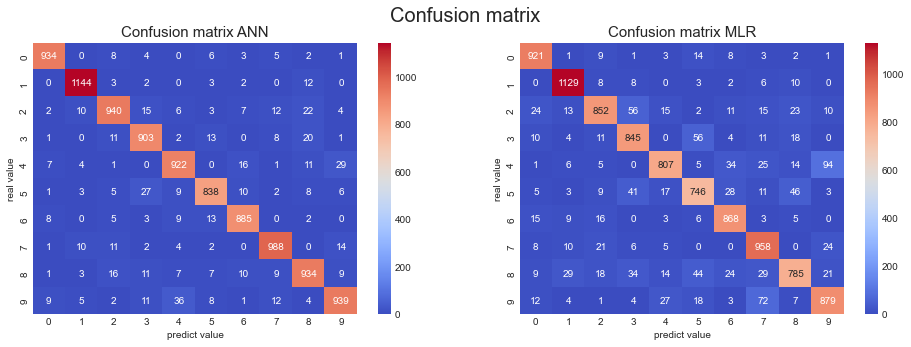

In [22]:
fig = plt.figure(figsize = (16, 5))
fig.suptitle("Confusion matrix", fontsize = 20)

ax1 = plt.subplot(121)
sns.heatmap(cm_ANN, annot = True, ax = ax1, fmt = 'g', cmap = 'coolwarm')
ax1.set_xlabel("predict value")
ax1.set_ylabel("real value")
ax1.set_title("Confusion matrix ANN", fontsize = 15)

ax2 = plt.subplot(122)
sns.heatmap(cm_MLR, annot = True, ax = ax2, fmt = 'g', cmap = 'coolwarm')
ax2.set_xlabel("predict value")
ax2.set_ylabel("real value")
ax2.set_title("Confusion matrix MLR", fontsize = 15)
plt.savefig('./results/Confusion_Matrix.png', bbox_inches='tight', dpi = 300)
plt.show()

#### b. So sánh Precision-Recall Score

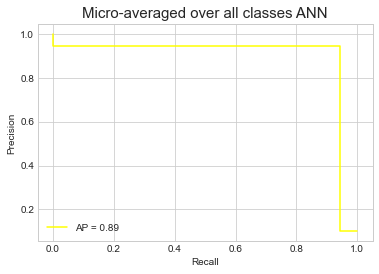

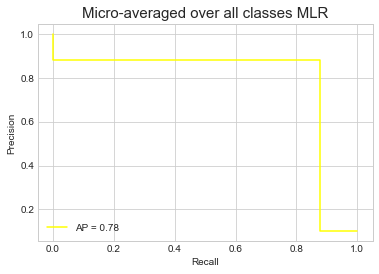

In [23]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

def draw_pre_rc_curve(test_labels, pred_labels, type = "ANN"):
    from sklearn.preprocessing import label_binarize
    precision = dict()
    recall = dict()
    average_precision = dict()

    y_test = label_binarize(test_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y_score = label_binarize(pred_labels, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    for i in range(10):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
    
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")
    
    display = PrecisionRecallDisplay(recall=recall["micro"], precision=precision["micro"], average_precision=average_precision["micro"],)
    display.plot(color="yellow")
    if (type == "ANN"):
        plt.savefig('./results/Average Precision ANN.png', bbox_inches='tight', dpi = 300)
        _ = display.ax_.set_title("Micro-averaged over all classes ANN", fontsize = 15)
    else:
        plt.savefig('./results/Average Precision MLR.png', bbox_inches='tight', dpi = 300)
        _ = display.ax_.set_title("Micro-averaged over all classes MLR", fontsize = 15)
    return precision, recall, average_precision

pre_ANN, rc_ANN, average_pre_ANN = draw_pre_rc_curve(test_labels, pred_labels_ANN)
pre_MLR, rc_MLR, average_pre_MLR = draw_pre_rc_curve(test_labels, pred_labels_MLR, "MLR")

plt.show()

In [24]:
import matplotlib.pyplot as plt
from itertools import cycle

def draw_extension_pre_rc(pre, rc, average_pre, type = "ANN"):

    precision, recall, average_precision = pre, rc, average_pre
    
    # setup plot details
    colors = ['black', 'blue', 'green', 'red', 'purple', 'brown', 'cyan', 'brown', 'chocolate', 'darkgreen', 'darkblue', 'azure', 'bisque', 'pink']
    _, ax = plt.subplots(figsize=(14, 10))

    lines, labels = [], []

    display = PrecisionRecallDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot(ax=ax, name="Micro-average precision-recall", color="yellow")

    for i, color in zip(range(10), colors):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i],
        )
        display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

    handles, labels = display.ax_.get_legend_handles_labels()

    # set the legend and the axes
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.legend(handles=handles, labels=labels, loc="best")
    
    if (type == "ANN"):
        ax.set_title("Extension of Precision-Recall curve to 10-class ANN", fontsize = 15)
        plt.savefig('./results/PR_ANN.png', bbox_inches='tight', dpi = 300)
    else:
        ax.set_title("Extension of Precision-Recall curve to 10-class MLR", fontsize = 15)
        plt.savefig('./results/PR_MLR.png', bbox_inches='tight', dpi = 300)
        
    plt.show()

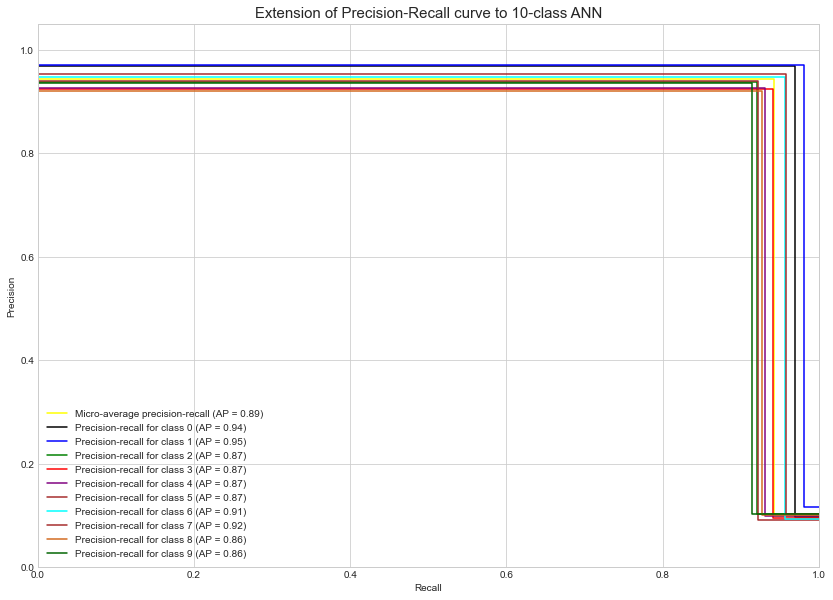

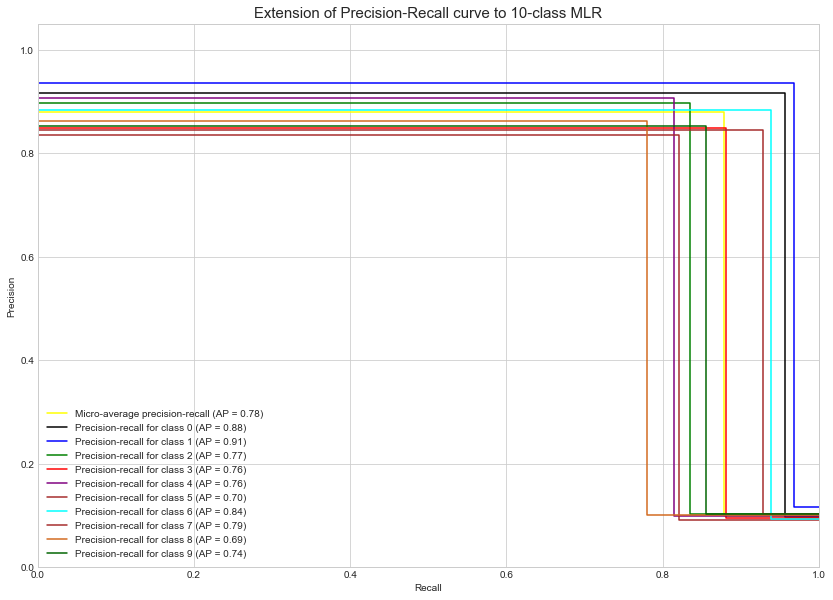

In [25]:
draw_extension_pre_rc(pre_ANN, rc_ANN, average_pre_ANN)
draw_extension_pre_rc(pre_MLR, rc_MLR, average_pre_MLR, type = "MLR")